## Groupe 2 : DEVEAUX Jérôme,NIANG Cheikh Ahmadou Bamba,PHAN Dinh Triem et VO Thanh Tin.

# Librairie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pylab import *
from statsmodels.graphics.mosaicplot import mosaic

# Partie A : Data preparation & Descriptive statistics

##  A.1 Data preparation

In [2]:
tit1=pd.read_csv("titanictrain.csv",skiprows=1,header=None,
  names=["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"])
tit1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### A.1.1 Etude des variables

In [3]:
tit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
tit1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### A.1.2 Variables qualitatives

In [5]:
tit1["Pclass"]=pd.Categorical(tit1["Pclass"],ordered=False)
tit1["Pclass"]=tit1["Pclass"].cat.rename_categories(["1","2","3"])
tit1["Name"]=pd.Categorical(tit1["Name"],ordered=False)
tit1["Sex"]=pd.Categorical(tit1["Sex"],ordered=False)
tit1["Sex"]=tit1["Sex"].cat.rename_categories(["female","male"])
tit1["Ticket"]=pd.Categorical(tit1["Ticket"],ordered=False)
tit1["Cabin"]=pd.Categorical(tit1["Cabin"],ordered=False)
tit1["Embarked"]=pd.Categorical(tit1["Embarked"],ordered=False)
tit1["Embarked"]=tit1["Embarked"].cat.rename_categories(["C","Q","S"])

In [6]:
x=tit1.copy()

In [7]:
tit1["Survived"]=pd.Categorical(tit1["Survived"],ordered=False)
tit1["Survived"]=tit1["Survived"].cat.rename_categories(["dead","alive"])

### A.1.3 Données triées

In [8]:
tit2 = tit1[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
tit2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,dead,3,male,22.0,1,0,7.2500,S
1,alive,1,female,38.0,1,0,71.2833,C
2,alive,3,female,26.0,0,0,7.9250,S
3,alive,1,female,35.0,1,0,53.1000,S
4,dead,3,male,35.0,0,0,8.0500,S
5,dead,3,male,NaN,0,0,8.4583,Q
6,dead,1,male,54.0,0,0,51.8625,S
7,dead,3,male,2.0,3,1,21.0750,S
8,alive,3,female,27.0,0,2,11.1333,S
9,alive,2,female,14.0,1,0,30.0708,C


In [9]:
tit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null category
Pclass      891 non-null category
Sex         891 non-null category
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null category
dtypes: category(4), float64(2), int64(2)
memory usage: 31.8 KB


In [10]:
tit2.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


## A.2 Descriptive statistics

### A.2.1 Description unidimensionnelle

#### A.2.1.1 Variables qualitatives

In [11]:
Survived = tit2['Survived'].value_counts()
print(Survived)
Pclass = tit2['Pclass'].value_counts()
print(Pclass)
Sex = tit2['Sex'].value_counts()
print(Sex)
Embarked = tit2['Embarked'].value_counts()
print(Embarked)

dead     549
alive    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


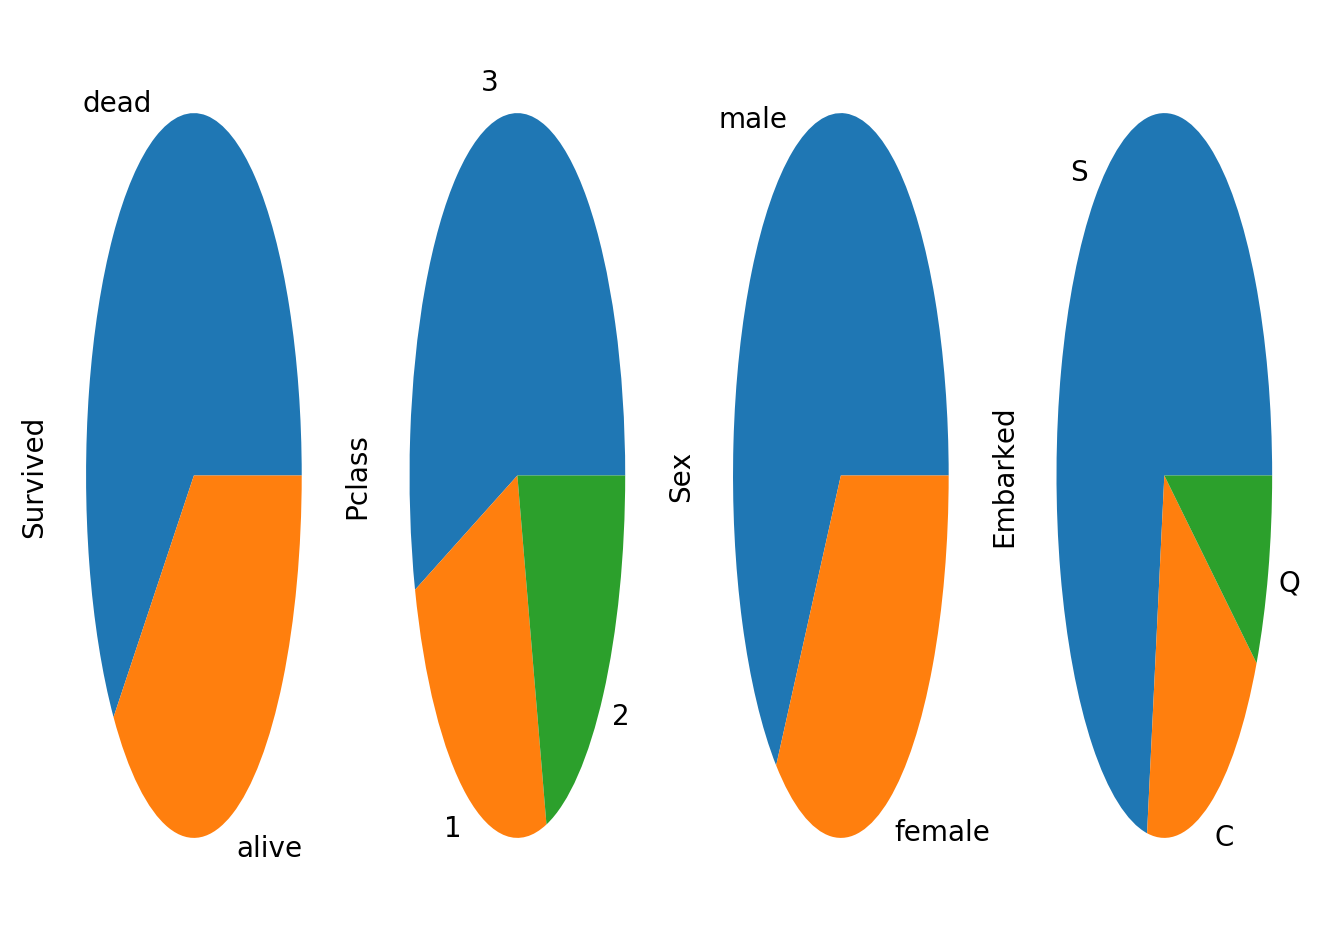

In [12]:
plt.figure(figsize=(8,6), dpi=200)
plt.subplot(141)
Survived.plot.pie()
plt.subplot(142)
Pclass.plot.pie()
plt.subplot(143)
Sex.plot.pie()
plt.subplot(144)
Embarked.plot.pie()
plt.show()

#### A.2.1.2 Variables quantitaves

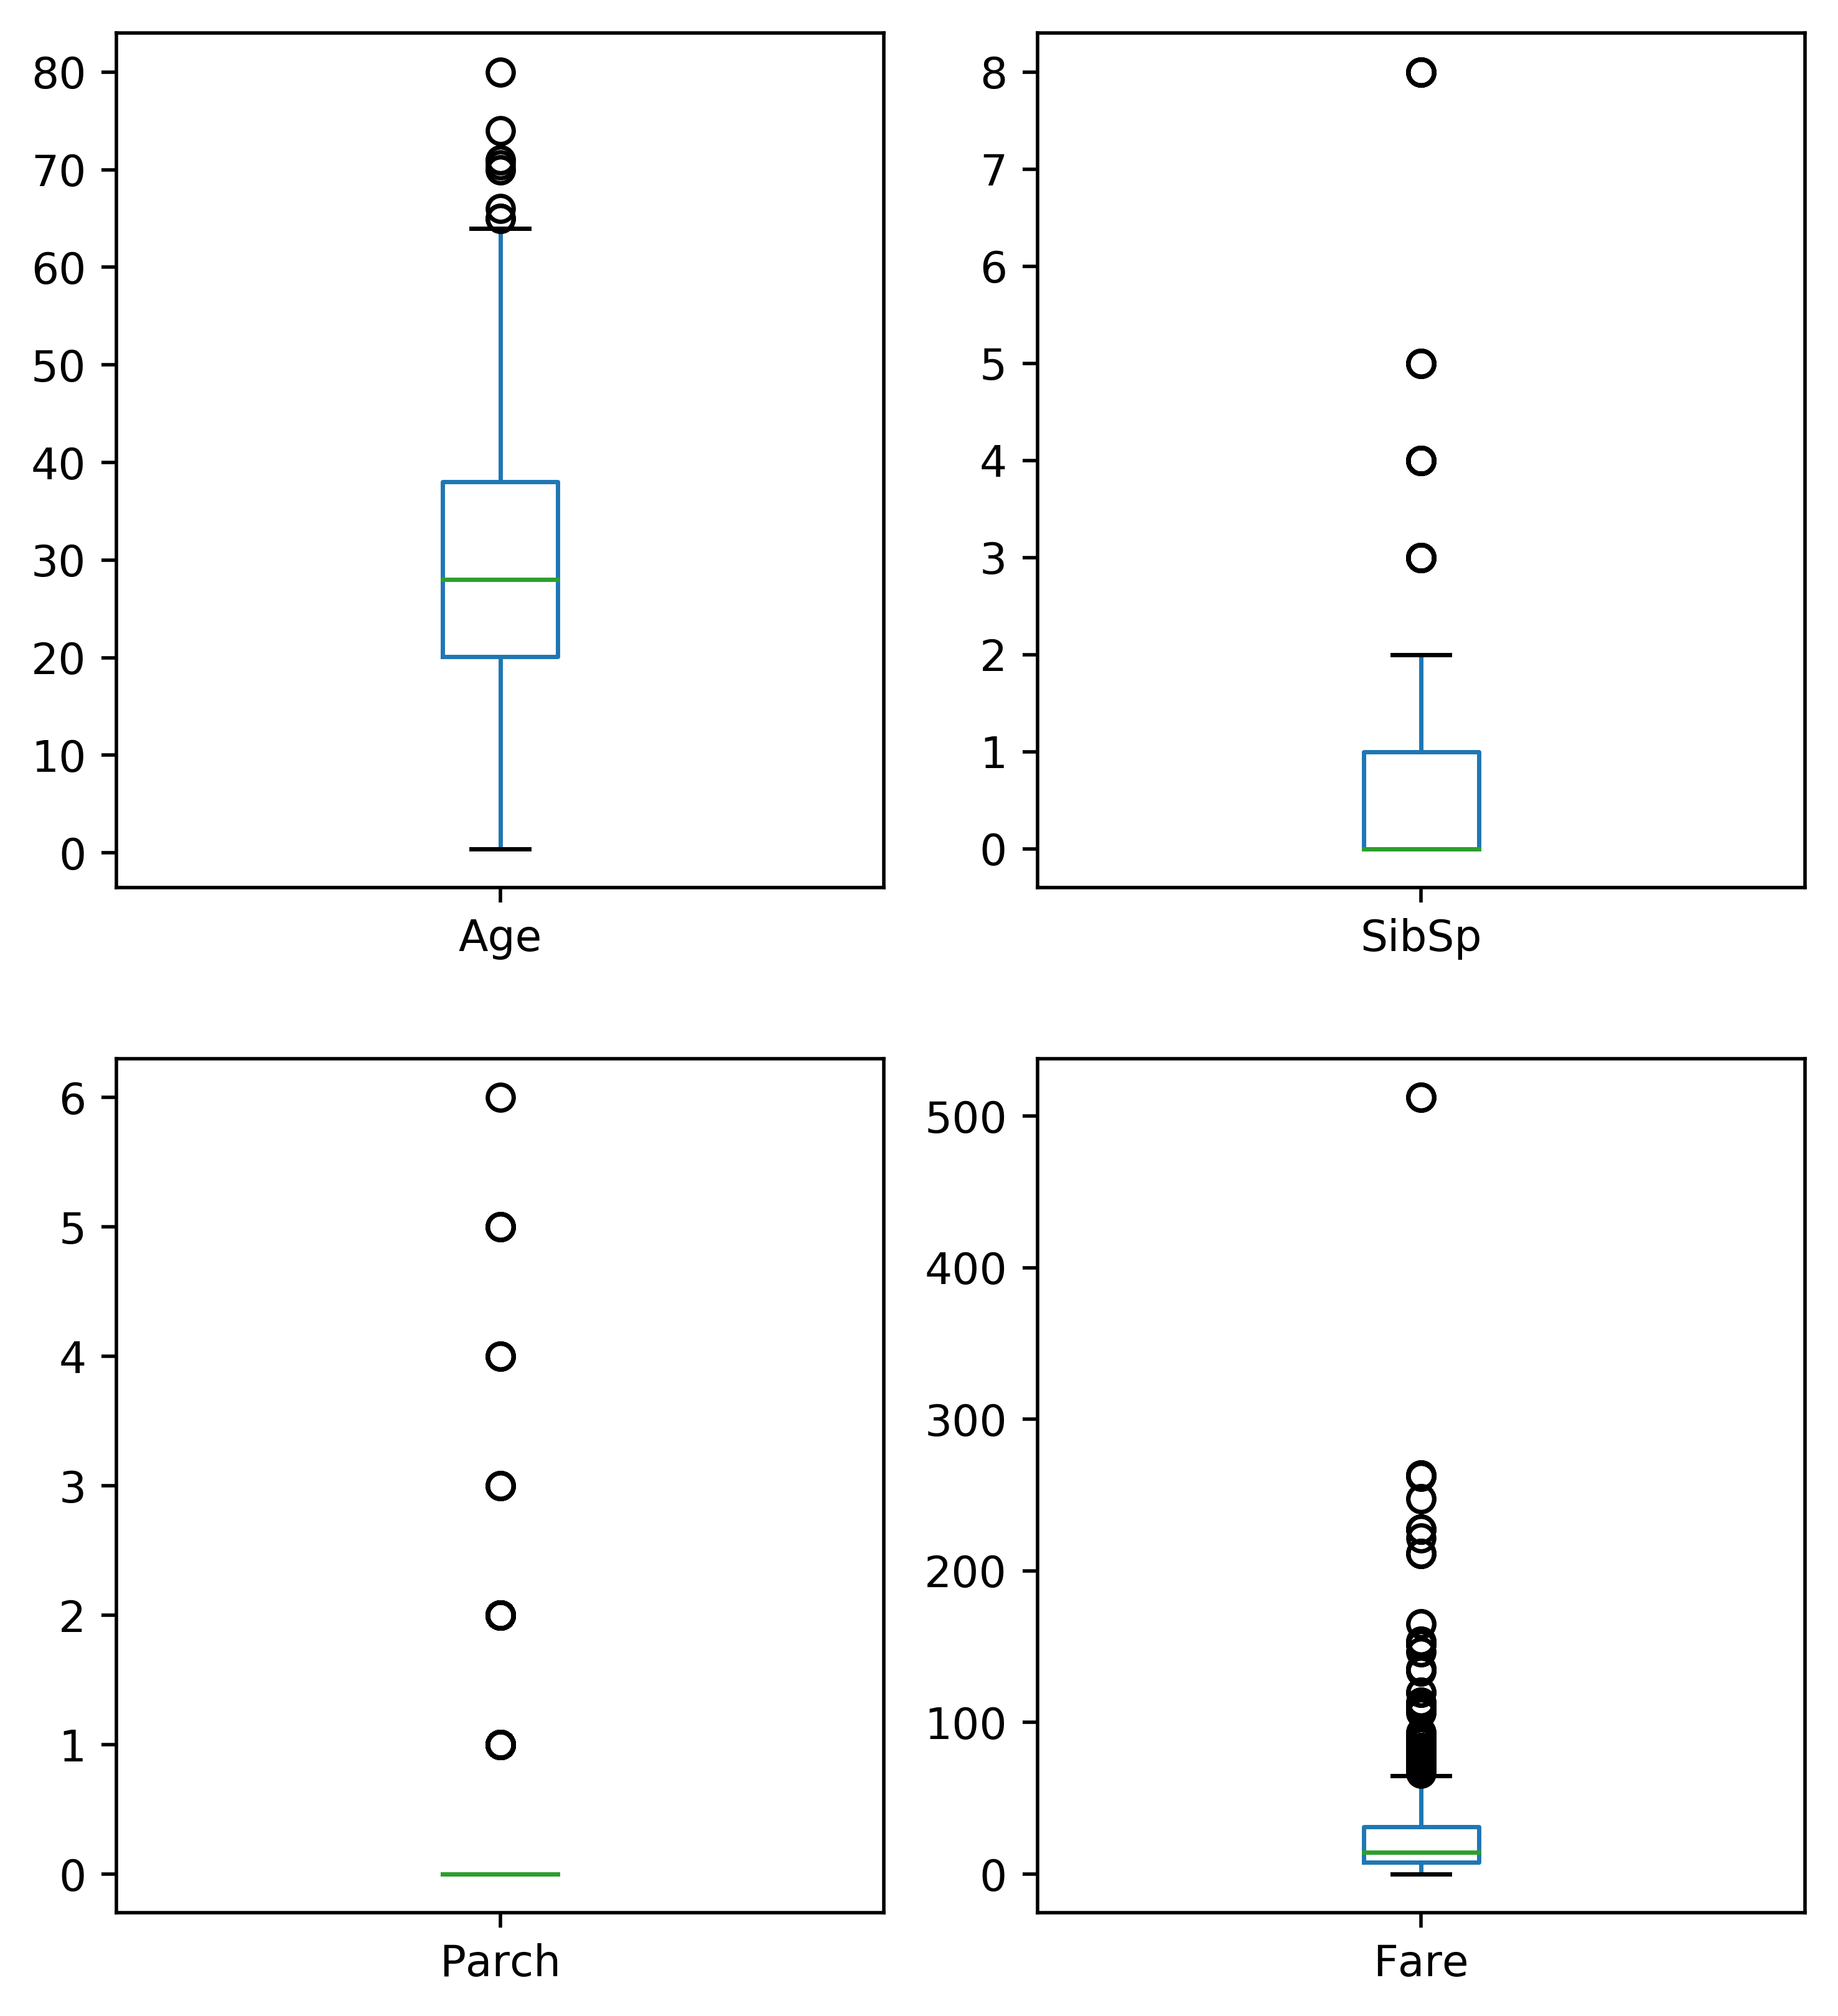

In [13]:
plt.figure(figsize=(7,8), dpi=500)
plt.subplot(221)
tit2["Age"].plot(kind="box")
plt.subplot(222)
tit2["SibSp"].plot(kind="box")
plt.subplot(223)
tit2["Parch"].plot(kind="box")
plt.subplot(224)
tit2["Fare"].plot(kind="box")
plt.show()

### A.2.2 Description bidimensionnelle

#### A.2.2.1 Interaction entre variables qualitatives

Sex       female  male
Survived              
dead          81   468
alive        233   109


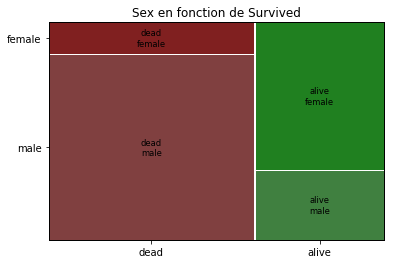

In [14]:
tabSC=pd.crosstab(tit2["Survived"],tit2["Sex"])
print(tabSC)
mosaic(tit2,["Survived","Sex"],title='Sex en fonction de Survived')
plt.show()

Pclass      1   2    3
Survived              
dead       80  97  372
alive     136  87  119


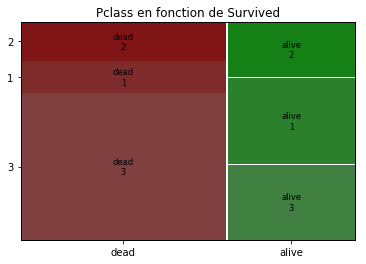

In [15]:
tabSC=pd.crosstab(tit2["Survived"],tit2["Pclass"])
print(tabSC)
mosaic(tit2,["Survived","Pclass"],title='Pclass en fonction de Survived')
plt.show()

Embarked   C   Q    S
Survived             
dead      75  47  427
alive     93  30  217


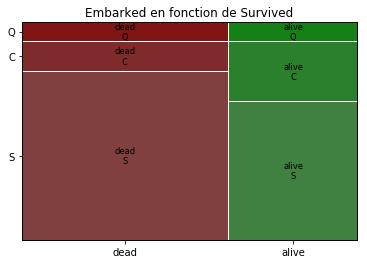

In [16]:
tabSC=pd.crosstab(tit2["Survived"],tit2["Embarked"])
print(tabSC)
mosaic(tit2,["Survived","Embarked"],title='Embarked en fonction de Survived')
plt.show()

#### A.2.2.2  Interaction entre variables quantitatives et qualitatives

C:\Users\Bamba\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


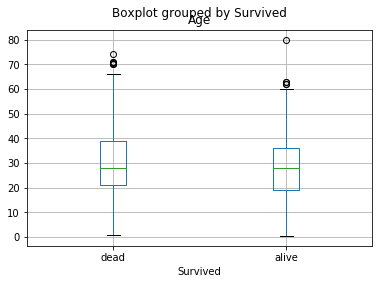

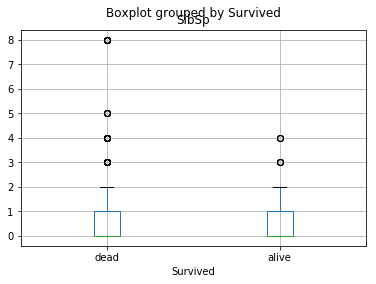

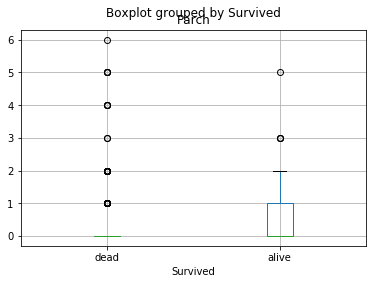

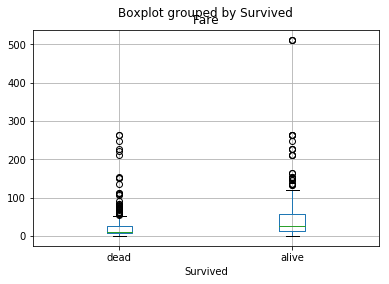

In [17]:
tit2.boxplot(column="Age",by="Survived")
tit2.boxplot(column="SibSp",by="Survived")
tit2.boxplot(column="Parch",by="Survived")
tit2.boxplot(column="Fare",by="Survived")
plt.show()


### A.2.3 Description multidimensionnelle

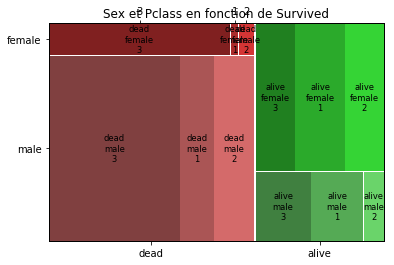

In [18]:
mosaic(tit2,["Survived","Sex","Pclass"],title='Sex et Pclass en fonction de Survived')
plt.show()

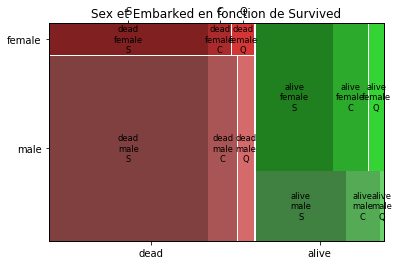

In [19]:
mosaic(tit2,["Survived","Sex","Embarked"],title='Sex et Embarked en fonction de Survived')
plt.show()

# Partie B: Sans la variable "Age"

In [20]:
nan_value = float("NaN")
x.replace("", nan_value, inplace=True)
x.dropna(subset = ["Embarked"], inplace=True)#effacer 2 individus qui n'ont pas de valeurs de "Embarked"
x.index=np.arange(889)

#tranformer les variables qualitatives en "dummy" variables

print(x)
xDum=pd.get_dummies(x[["Pclass","Sex","Embarked"]])

del xDum["Pclass_1"] #enlever la première modalité pour rendre le modèle identifiable 
del xDum["Sex_female"]
del xDum["Embarked_C"]
Y=x["Survived"]
xQuant=x[["Age","SibSp","Parch","Fare"]]
dfC=pd.concat([xDum,xQuant],axis=1)
dfC.head()


from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(dfC,Y,test_size=1/3,random_state=0)
X_train

     PassengerId  Survived Pclass  \
0              1         0      3   
1              2         1      1   
2              3         1      3   
3              4         1      1   
4              5         0      3   
5              6         0      3   
6              7         0      1   
7              8         0      3   
8              9         1      3   
9             10         1      2   
10            11         1      3   
11            12         1      1   
12            13         0      3   
13            14         0      3   
14            15         0      3   
15            16         1      2   
16            17         0      3   
17            18         1      2   
18            19         0      3   
19            20         1      3   
20            21         0      2   
21            22         1      2   
22            23         1      3   
23            24         1      1   
24            25         0      3   
25            26         1      3   
2

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
432,0,1,1,0,1,17.00,0,0,7.1250
650,1,0,0,0,1,18.00,0,1,23.0000
636,1,0,1,0,1,31.00,1,1,26.2500
78,0,1,0,0,1,30.00,0,0,12.4750
418,0,1,0,0,1,10.00,0,2,24.1500
198,1,0,0,0,1,24.00,0,0,13.0000
724,0,1,1,0,1,20.00,0,0,8.6625
811,1,0,1,0,1,35.00,0,0,10.5000
694,1,0,1,0,1,52.00,0,0,13.5000
356,1,0,0,0,1,38.00,0,0,13.0000


## B.1 Régression logistique

### B.1.1 Sans interaction

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\Bamba\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [22]:
X_sans_age_train = X_train[["Pclass_2","Pclass_3","Sex_male","Embarked_Q","Embarked_S","SibSp","Parch","Fare"]]
X_sans_age_test = X_test[["Pclass_2","Pclass_3","Sex_male","Embarked_Q","Embarked_S","SibSp","Parch","Fare"]]


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [24]:
# Optimisation du paramètre de pénalisation
# grille de valeurs

param=[{"C":[1,1.2,1.5,1.7,2,3,0.8]}]
logit = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt=logit.fit(X_sans_age_train, Y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
logitOpt.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt.best_score_,logitOpt.best_params_))

Meilleur score = 0.189189, Meilleur paramètre = {'C': 1.2}


In [25]:
# erreur sur l'échantillon test
1-logitOpt.score(X_sans_age_test, Y_test)

0.23232323232323238

In [26]:
# Prévision
y_chap = logitOpt.predict(X_sans_age_test)

# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)
#print((table[0][0]+table[1][1])/(table[0][0]+table[1][1]+table[0][1]+table[1][0]))

Survived    0   1
row_0            
0         150  42
1          27  78


In [27]:
logitLasso=LogisticRegression(penalty="l1",C=logitOpt.best_params_['C'],
                              solver="liblinear")
logitCoef=logitLasso.fit(X_sans_age_train,Y_train).coef_
print(logitCoef[0])

[-0.50982241 -1.46998065 -2.78442113  0.13878974 -0.5915153  -0.20627538
 -0.07476573  0.00298251]


In [28]:
coef = pd.Series(logitCoef[0], index = X_sans_age_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 8 variables et en supprime 0


In [29]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

Text(0.5,1,'Coefficients du modèle lasso')

### B.1.2 Avec interaction

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True)
X_inter=dfC[["Pclass_2","Pclass_3","Sex_male","Embarked_Q","Embarked_S","SibSp"]]# les interactions entre ces variables
#print(X_inter.columns)
X_inter2=poly.fit_transform(X_inter)#creer la matrice des interactions
X_inter2=pd.DataFrame(X_inter2)# tranformer array en dataframe 
poly.get_feature_names(X_inter.columns)
#X_inter2
X_inter2.columns=poly.get_feature_names(X_inter.columns)
del X_inter2["1"]
del  X_inter2["Pclass_2 Pclass_3"]
del  X_inter2["Embarked_Q Embarked_S"]

In [31]:
X_inter2=pd.concat([X_inter2,dfC[["Parch","Fare"]]],axis=1)
#len(X_inter2)-len(Y)
X_inter2

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,SibSp,Pclass_2 Sex_male,Pclass_2 Embarked_Q,Pclass_2 Embarked_S,Pclass_2 SibSp,...,Pclass_3 Embarked_Q,Pclass_3 Embarked_S,Pclass_3 SibSp,Sex_male Embarked_Q,Sex_male Embarked_S,Sex_male SibSp,Embarked_Q SibSp,Embarked_S SibSp,Parch,Fare
0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0,7.2500
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,71.2833
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7.9250
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,53.1000
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,8.0500
5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,8.4583
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,51.8625
7,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,0.0,1.0,3.0,0.0,3.0,1,21.0750
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,11.1333
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,30.0708


In [32]:
from sklearn.model_selection import train_test_split  
X_sans_age_inter_train,X_sans_age_inter_test,Y_train,Y_test=train_test_split(X_inter2,Y,test_size=1/3,random_state=0)

In [33]:
# Optimisation du paramètre de pénalisation
# grille de valeurs

param=[{"C":[1,1.2,1.5,1.7,2,3,4,5,6]}]
logit = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt_inter=logit.fit(X_sans_age_inter_train, Y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
logitOpt.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt.best_score_,logitOpt.best_params_))

Meilleur score = 0.189189, Meilleur paramètre = {'C': 1.2}


In [34]:
# erreur sur l'échantillon test
1-logitOpt_inter.score(X_sans_age_inter_test, Y_test)

0.22558922558922556

In [35]:
# Prévision
y_chap = logitOpt_inter.predict(X_sans_age_inter_test)

# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)
#print((table[0][0]+table[1][1])/(table[0][0]+table[1][1]+table[0][1]+table[1][0]))

Survived    0   1
row_0            
0         165  55
1          12  65


In [36]:
logitLasso=LogisticRegression(penalty="l1",C=logitOpt_inter.best_params_['C'],
                              solver="liblinear")
logitCoef=logitLasso.fit(X_sans_age_inter_train,Y_train).coef_
print(logitCoef[0])

[ -7.63115960e-01  -2.27221073e+00  -3.56504944e+00   3.86853559e-01
   0.00000000e+00   2.46898060e-01  -8.51107095e-01   0.00000000e+00
  -5.06814251e-02   5.28719432e-01   1.78688120e+00   7.17682065e-01
  -8.32064301e-01  -1.50866056e-01  -2.12209165e+00  -1.24128303e-01
   3.19116939e-01  -2.46463505e-01  -4.29339925e-01   0.00000000e+00
   1.19788970e-03]


In [37]:
coef = pd.Series(logitCoef[0], index = X_sans_age_inter_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 18 variables et en supprime 3


In [38]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

Text(0.5,1,'Coefficients du modèle lasso')

### B.2.1 Arbre binaire

In [39]:
X_sans_age_train

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,SibSp,Parch,Fare
432,0,1,1,0,1,0,0,7.1250
650,1,0,0,0,1,0,1,23.0000
636,1,0,1,0,1,1,1,26.2500
78,0,1,0,0,1,0,0,12.4750
418,0,1,0,0,1,0,2,24.1500
198,1,0,0,0,1,0,0,13.0000
724,0,1,1,0,1,0,0,8.6625
811,1,0,1,0,1,0,0,10.5000
694,1,0,1,0,1,0,0,13.5000
356,1,0,0,0,1,0,0,13.0000


In [40]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_sans_age_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.190878, Meilleur paramètre = {'max_depth': 3}


In [41]:
# Estimation de l'erreur de prévision
1-treeOpt.score(X_sans_age_test,Y_test)

0.24242424242424243

In [42]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(X_sans_age_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

Survived    0   1
row_0            
0         148  43
1          29  77


In [43]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(X_sans_age_train,Y_train)
dot_data = StringIO() 
export_graphviz(treeG, out_file=dot_data) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("treeOpt.png")  

True

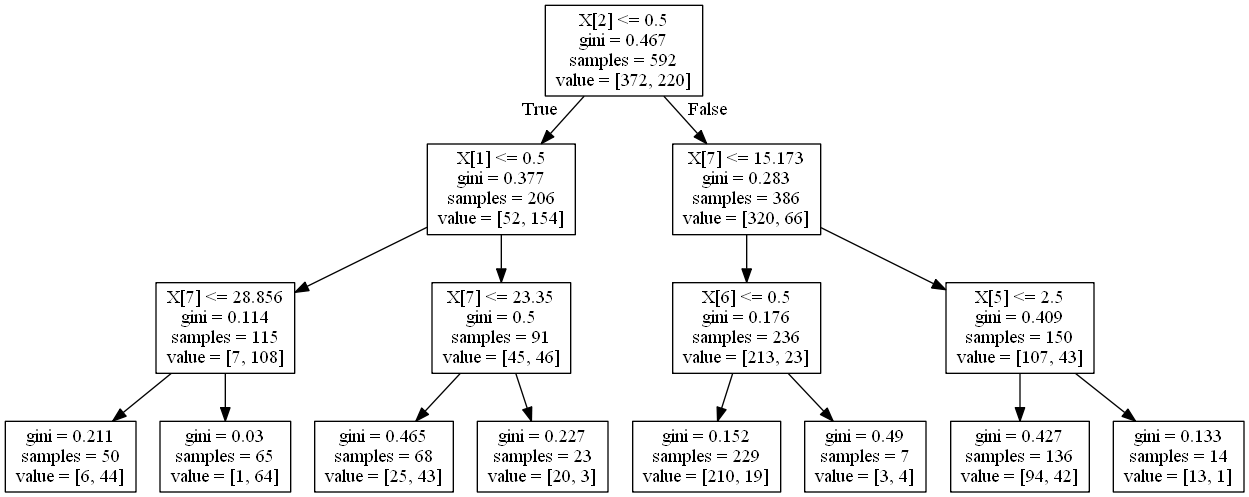

In [44]:
from IPython.display import Image
Image(filename='treeOpt.png')

### B.2.2 Foret aleatoire

In [45]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True,random_state=111)
# apprentissage
rfFit = forest.fit(X_sans_age_train,Y_train)
print(1-rfFit.oob_score_)

0.195945945946


In [46]:
param=[{"max_features":list(range(2,9,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=500,
                                        random_state=111),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(X_sans_age_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.187500, Meilleur paramètre = {'max_features': 8}


In [47]:
# erreur de prévision sur le test
1-rfOpt.score(X_sans_age_test,Y_test)

0.21212121212121215

In [48]:
rf= RandomForestClassifier(n_estimators=500,max_features=8)
rfFit=rf.fit(X_sans_age_train, Y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_sans_age_train.shape[1]):
    print(X_sans_age_train.columns[indices[f]], importances[indices[f]])

Sex_male 0.382005712401
Fare 0.356309047769
Pclass_3 0.0867260696522
Parch 0.0648667953622
SibSp 0.0478691423844
Embarked_S 0.036916988474
Embarked_Q 0.0169191009223
Pclass_2 0.00838714303441


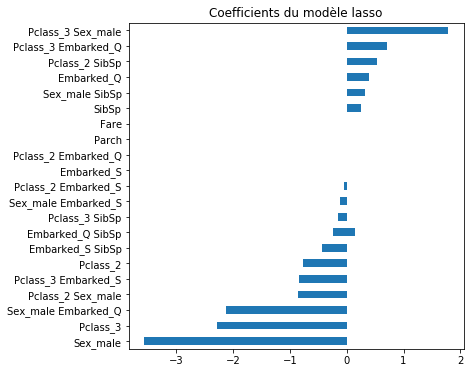

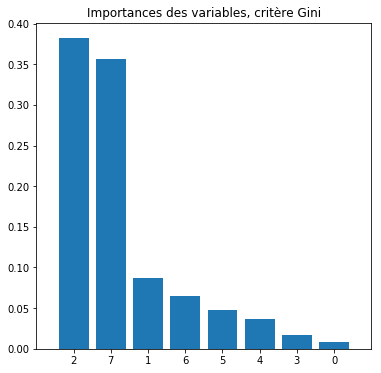

In [49]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables, critère Gini")
plt.bar(range(X_sans_age_train.shape[1]), importances[indices])
plt.xticks(range(X_sans_age_train.shape[1]), indices)
plt.xlim([-1, X_sans_age_train.shape[1]])
plt.show()

Fare 0.417102805933
Sex_male 0.302689177549
Pclass_3 0.0900938563534
Parch 0.0718434529395
SibSp 0.0520762209028
Embarked_S 0.0357517777388
Embarked_Q 0.019604024596
Pclass_2 0.0108386839875


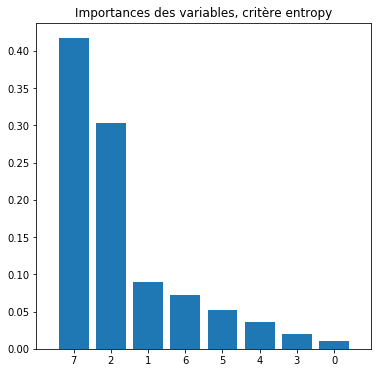

In [50]:
# apprentissage
rfFit = forest.fit(X_sans_age_train,Y_train)
param=[{"max_features":list(range(2,9,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=500,criterion='entropy',
                                        random_state=111),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(X_sans_age_train, Y_train)
rf= RandomForestClassifier(n_estimators=500,max_features=8,criterion='entropy')
rfFit=rf.fit(X_sans_age_train, Y_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_sans_age_train.shape[1]):
    print(X_sans_age_train.columns[indices[f]], importances[indices[f]])
# Graphe des importances
plt.figure()
plt.title("Importances des variables, critère entropy")
plt.bar(range(X_sans_age_train.shape[1]), importances[indices])
plt.xticks(range(X_sans_age_train.shape[1]), indices)
plt.xlim([-1, X_sans_age_train.shape[1]])
plt.show()

## B.3 Comparaison des méthodes: Courbes ROC

In [51]:
from sklearn.metrics import roc_curve
listMethod=[["RF",rfOpt],["Tree",treeOpt],["Logit",logitOpt]]

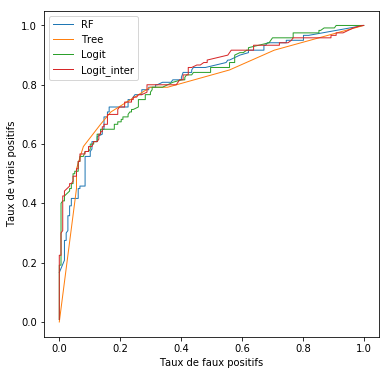

In [52]:
for method in enumerate(listMethod):
    probas_ = method[1][1].fit(X_sans_age_train, Y_train).predict_proba(X_sans_age_test)
    fpr, tpr, thresholds = roc_curve(Y_test, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
#method=enumerate[["Logit_inter",logitOpt_inter]]
probas_ = logitOpt_inter.fit(X_sans_age_inter_train, Y_train).predict_proba(X_sans_age_inter_test)
fpr, tpr, thresholds = roc_curve(Y_test, probas_[:,1])
plt.plot(fpr, tpr, lw=1,label="Logit_inter")

plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()

# Partie C

In [53]:
xDum=pd.get_dummies(x[["Pclass","Sex","Embarked"]])
Y=x["Survived"]
xQuant=x[["Age","SibSp","Parch","Fare"]]
dfC=pd.concat([xDum,xQuant],axis=1)
dfC.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
0,0,0,1,0,1,0,0,1,22.0,1,0,7.2500
1,1,0,0,1,0,1,0,0,38.0,1,0,71.2833
2,0,0,1,1,0,0,0,1,26.0,0,0,7.9250
3,1,0,0,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,1,0,1,0,0,1,35.0,0,0,8.0500


## C.1 Imputation des données manquantes avec missforest

In [54]:
from predictive_imputer import predictive_imputer
# Choix du mode de prévision par *k*-pp, ACP ou forêt aléatoire
imputer = predictive_imputer.PredictiveImputer(f_model="RandomForest")
# Imputation
TitaImp = pd.DataFrame(imputer.fit(dfC).transform(dfC.copy()))
#TitaImp.rename(columns=dfC.columns)

#### Transformation des données  

In [55]:
dfC.dtypes

Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Age           float64
SibSp           int64
Parch           int64
Fare          float64
dtype: object

In [56]:
TitaImp.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
dtype: object

In [57]:
TitaImp.columns=dfC.columns

In [58]:
TitaImp.dtypes

Pclass_1      float64
Pclass_2      float64
Pclass_3      float64
Sex_female    float64
Sex_male      float64
Embarked_C    float64
Embarked_Q    float64
Embarked_S    float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
dtype: object

In [59]:
TitaImp.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,35.0,0.0,0.0,8.0500


In [60]:
del TitaImp["Pclass_1"] #enlever la première modalité pour rendre le modèle identifiable 
del TitaImp["Sex_female"]
del TitaImp["Embarked_C"]

In [61]:
TitaImp.head()

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
0,0.0,1.0,1.0,0.0,1.0,22.0,1.0,0.0,7.2500
1,0.0,0.0,0.0,0.0,0.0,38.0,1.0,0.0,71.2833
2,0.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0,7.9250
3,0.0,0.0,0.0,0.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,1.0,0.0,1.0,35.0,0.0,0.0,8.0500


## C.2 Séparation des donnés

In [62]:
from sklearn.model_selection import train_test_split  
XImp_train,XImp_test,YImp_train,YImp_test=train_test_split(TitaImp,Y,test_size=1/3,random_state=0)

## C.3 Régression 

### C.3.1 Sans interaction

In [63]:
param=[{"C":[1,1.2,1.5,1.7,2,3,0.8]}]
logit = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt=logit.fit(XImp_train, YImp_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
logitOpt.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt.best_score_,logitOpt.best_params_))

Meilleur score = 0.179054, Meilleur paramètre = {'C': 1.5}


In [64]:
# erreur sur l'échantillon test
1-logitOpt.score(XImp_test, YImp_test)

0.23232323232323238

In [65]:
# Prévision
yImp_chap = logitOpt.predict(XImp_test)

# matrice de confusion
table=pd.crosstab(yImp_chap,YImp_test)
print(table)

Survived    0   1
row_0            
0         150  42
1          27  78


In [66]:
logitLasso=LogisticRegression(penalty="l1",C=logitOpt.best_params_['C'],
                              solver="liblinear")
logitCoef=logitLasso.fit(XImp_train,YImp_train).coef_
print(logitCoef[0])

[ -1.19860958e+00  -2.47052925e+00  -2.73830722e+00   4.97173508e-01
  -4.10697321e-01  -5.34816589e-02  -3.76564402e-01  -4.17732516e-02
   1.20237281e-03]


In [67]:
coef = pd.Series(logitCoef[0], index = XImp_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 9 variables et en supprime 0


In [68]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

Text(0.5,1,'Coefficients du modèle lasso')

### C.3.2 Avec intéractions

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True)
X_inter=TitaImp[["Pclass_2","Pclass_3","Sex_male","Embarked_Q","Embarked_S","SibSp"]]# les interactions entre ces variables
#print(X_inter.columns)
X_inter2=poly.fit_transform(X_inter)#creer la matrice des interactions
X_inter2=pd.DataFrame(X_inter2)# tranformer array en dataframe 
poly.get_feature_names(X_inter.columns)
#X_inter2
X_inter2.columns=poly.get_feature_names(X_inter.columns)
del X_inter2["1"]

In [70]:
X_inter2=pd.concat([X_inter2,TitaImp[["Age","Parch","Fare"]]],axis=1)
#len(X_inter2)-len(Y)
X_inter2

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,SibSp,Pclass_2 Pclass_3,Pclass_2 Sex_male,Pclass_2 Embarked_Q,Pclass_2 Embarked_S,...,Pclass_3 SibSp,Sex_male Embarked_Q,Sex_male Embarked_S,Sex_male SibSp,Embarked_Q Embarked_S,Embarked_Q SibSp,Embarked_S SibSp,Age,Parch,Fare
0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,22.000000,0.0,7.2500
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.000000,0.0,71.2833
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.000000,0.0,7.9250
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.000000,0.0,53.1000
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,35.000000,0.0,8.0500
5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.251758,0.0,8.4583
6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,54.000000,0.0,51.8625
7,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,3.0,0.0,0.0,3.0,2.000000,1.0,21.0750
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.000000,2.0,11.1333
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000,0.0,30.0708


In [71]:
from sklearn.model_selection import train_test_split  
X_interImp_train,X_interImp_test,Y_train,Y_test=train_test_split(X_inter2,Y,test_size=1/3,random_state=0)

In [72]:
# Optimisation du paramètre de pénalisation
# grille de valeurs

param=[{"C":[1,1.2,1.5,1.7,2,3,4,5,6]}]
logit = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt_inter=logit.fit(X_interImp_train, Y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
logitOpt_inter.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt_inter.best_score_,logitOpt_inter.best_params_))

Meilleur score = 0.157095, Meilleur paramètre = {'C': 1.5}


In [73]:
# erreur sur l'échantillon test
1-logitOpt_inter.score(X_interImp_test, Y_test)

0.23232323232323238

In [74]:
# Prévision
#yImp_chap = logitOpt_inter.predict(XImp_test)

# matrice de confusion
#table=pd.crosstab(yImp_chap,YImp_test)
#print(table)

## C.4 Arbres et Forêts aléatoires

### C.4.1 Arbres aléatoires

In [75]:
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(XImp_train, YImp_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.168919, Meilleur paramètre = {'max_depth': 3}


In [76]:
# Estimation de l'erreur de prévision
1-treeOpt.score(XImp_test,YImp_test)

0.21885521885521886

In [77]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(XImp_test)
# matrice de confusion
table=pd.crosstab(y_chap,YImp_test)
print(table)

Survived    0   1
row_0            
0         152  40
1          25  80


In [78]:
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(XImp_train,YImp_train)
dot_data = StringIO() 
export_graphviz(treeG, out_file=dot_data) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("treeOptImp.png")  

True

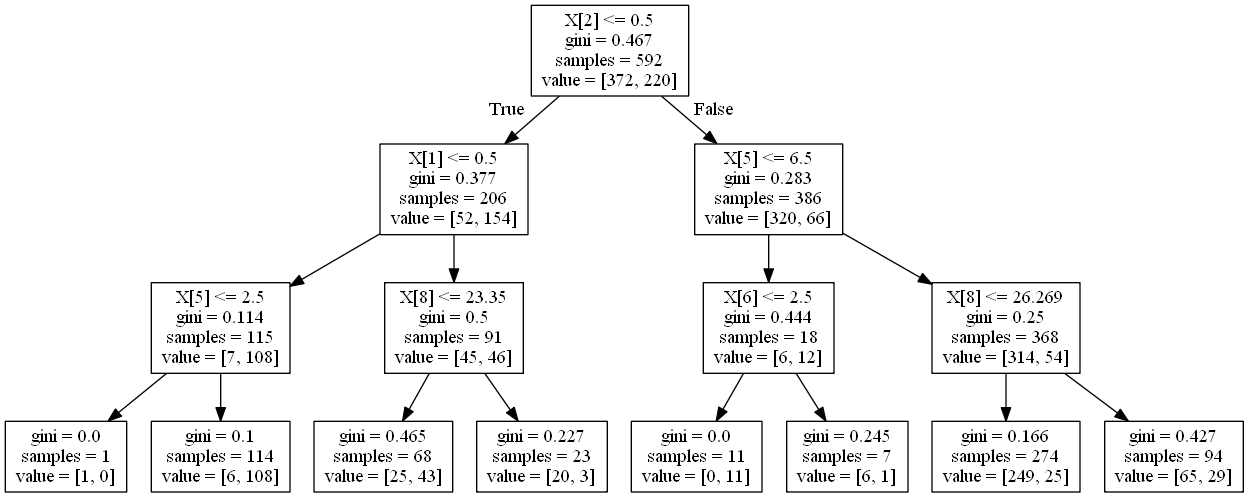

In [79]:
from IPython.display import Image
Image(filename='treeOptImp.png')

### C.4.2 Forêts aléatoires

In [80]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(XImp_train,YImp_train)
print(1-rfFit.oob_score_)

0.173986486486


In [81]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(XImp_train, YImp_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.157095, Meilleur paramètre = {'max_features': 7}


In [82]:
# erreur de prévision sur le test
1-rfOpt.score(XImp_test,YImp_test)

0.23569023569023573

In [83]:
# prévision
y_chap = rfFit.predict(XImp_test)
# matrice de confusion
table=pd.crosstab(y_chap,YImp_test)
print(table)

Survived    0   1
row_0            
0         151  41
1          26  79


Age 0.27907565515
Sex_male 0.251403671173
Fare 0.246653431122
Pclass_3 0.0677543527438
SibSp 0.048717860966
Parch 0.0435255879021
Embarked_S 0.032211843017
Pclass_2 0.0177200756583
Embarked_Q 0.0129375222679


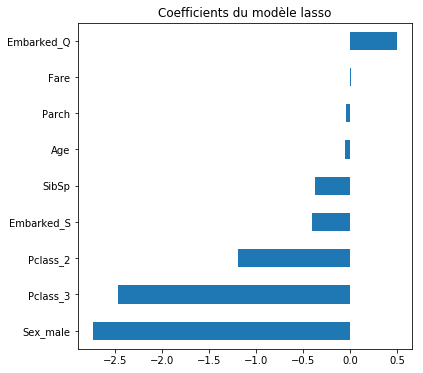

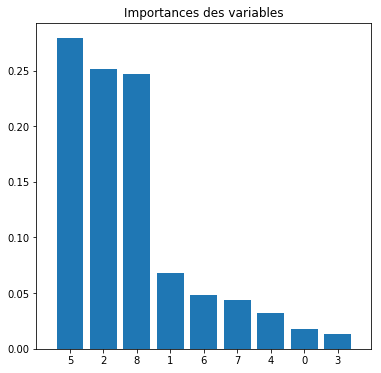

In [84]:
rf= RandomForestClassifier(n_estimators=100,max_features=2)
rfFit=rf.fit(XImp_train, YImp_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(XImp_train.shape[1]):
    print(TitaImp.columns[indices[f]], importances[indices[f]])

# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.bar(range(XImp_train.shape[1]), importances[indices])
plt.xticks(range(XImp_train.shape[1]), indices)
plt.xlim([-1, XImp_train.shape[1]])
plt.show()

## C.5 Courbes ROC

In [85]:
from sklearn.metrics import roc_curve
listMethod=[["RF",rfOpt],["Tree",treeOpt],["Logit",logitOpt],["Logit avec Inter",logitOpt_inter]]

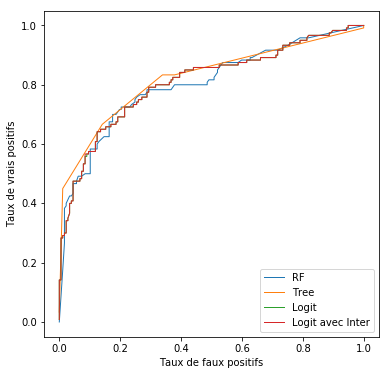

In [86]:
for method in enumerate(listMethod):
    probas_ = method[1][1].fit(XImp_train, YImp_train).predict_proba(XImp_test)
    fpr, tpr, thresholds = roc_curve(YImp_test, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show()